## Load data and plot cases

In [1]:
import pandas as pd

In [2]:
# src: https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0
df = pd.read_csv("data/RKI.csv")

In [3]:
df.tail()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
1102950,16,Thüringen,LK Altenburger Land,A80+,W,2,0,1102951,2021/01/20 00:00:00+00,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/20 00:00:00+00,-9,0,0,Nicht übermittelt
1102951,16,Thüringen,LK Altenburger Land,A80+,W,4,0,1102952,2021/01/21 00:00:00+00,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/21 00:00:00+00,-9,0,0,Nicht übermittelt
1102952,16,Thüringen,LK Altenburger Land,A80+,W,5,0,1102953,2021/01/22 00:00:00+00,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/22 00:00:00+00,-9,0,0,Nicht übermittelt
1102953,16,Thüringen,LK Altenburger Land,A80+,W,6,0,1102954,2021/01/23 00:00:00+00,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/23 00:00:00+00,-9,0,0,Nicht übermittelt
1102954,16,Thüringen,LK Altenburger Land,A80+,W,3,0,1102955,2021/01/24 00:00:00+00,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/24 00:00:00+00,-9,0,0,Nicht übermittelt


In [4]:
df.dtypes

IdBundesland             int64
Bundesland              object
Landkreis               object
Altersgruppe            object
Geschlecht              object
AnzahlFall               int64
AnzahlTodesfall          int64
ObjectId                 int64
Meldedatum              object
IdLandkreis              int64
Datenstand              object
NeuerFall                int64
NeuerTodesfall           int64
Refdatum                object
NeuGenesen               int64
AnzahlGenesen            int64
IstErkrankungsbeginn     int64
Altersgruppe2           object
dtype: object

In [5]:
df["Meldedatum"] = df["Meldedatum"].str.extract(r'^(\d\d\d\d\/\d\d\/\d\d).*$')
df["Refdatum"] = df["Refdatum"].str.extract(r'^(\d\d\d\d\/\d\d\/\d\d).*$')

In [6]:
df.tail()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
1102950,16,Thüringen,LK Altenburger Land,A80+,W,2,0,1102951,2021/01/20,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/20,-9,0,0,Nicht übermittelt
1102951,16,Thüringen,LK Altenburger Land,A80+,W,4,0,1102952,2021/01/21,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/21,-9,0,0,Nicht übermittelt
1102952,16,Thüringen,LK Altenburger Land,A80+,W,5,0,1102953,2021/01/22,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/22,-9,0,0,Nicht übermittelt
1102953,16,Thüringen,LK Altenburger Land,A80+,W,6,0,1102954,2021/01/23,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/23,-9,0,0,Nicht übermittelt
1102954,16,Thüringen,LK Altenburger Land,A80+,W,3,0,1102955,2021/01/24,16077,"26.01.2021, 00:00 Uhr",0,-9,2021/01/24,-9,0,0,Nicht übermittelt


In [7]:
df["Meldedatum"] = pd.to_datetime(df["Meldedatum"])
df["Refdatum"] = pd.to_datetime(df["Refdatum"])

In [8]:
df.dtypes

IdBundesland                     int64
Bundesland                      object
Landkreis                       object
Altersgruppe                    object
Geschlecht                      object
AnzahlFall                       int64
AnzahlTodesfall                  int64
ObjectId                         int64
Meldedatum              datetime64[ns]
IdLandkreis                      int64
Datenstand                      object
NeuerFall                        int64
NeuerTodesfall                   int64
Refdatum                datetime64[ns]
NeuGenesen                       int64
AnzahlGenesen                    int64
IstErkrankungsbeginn             int64
Altersgruppe2                   object
dtype: object

In [9]:
df.set_index("Meldedatum", inplace=True)
df.index

DatetimeIndex(['2020-09-30', '2020-10-29', '2020-11-03', '2020-11-20',
               '2020-11-23', '2020-12-18', '2021-01-06', '2021-01-08',
               '2021-01-09', '2021-01-16',
               ...
               '2021-01-16', '2021-01-16', '2021-01-17', '2021-01-18',
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-23', '2021-01-24'],
              dtype='datetime64[ns]', name='Meldedatum', length=1102955, freq=None)

<AxesSubplot:xlabel='Meldedatum'>

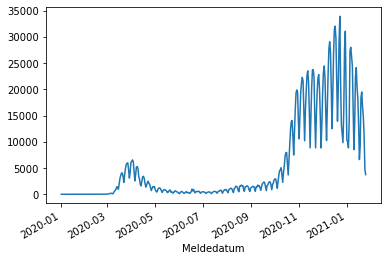

In [10]:
df.groupby(["Meldedatum"]).AnzahlFall.sum().plot()

## Preprocessing the Dataset for Time Series Analysis
src: 
https://towardsdatascience.com/3-steps-to-forecast-time-series-lstm-with-tensorflow-keras-ba88c6f05237 , 
https://towardsdatascience.com/3-steps-to-forecast-time-series-lstm-with-tensorflow-keras-ba88c6f05237

In [11]:
df = df.groupby(["Meldedatum"]).AnzahlFall.sum().reset_index()
df

,Meldedatum,AnzahlFall
0,2020-01-02,6
1,2020-01-03,6
2,2020-01-04,3
3,2020-01-05,1
4,2020-01-06,1
...,...,...
371,2021-01-21,16695
372,2021-01-22,14808
373,2021-01-23,11381
374,2021-01-24,4798


In [12]:
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import Sequence
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import time
import numpy as np

In [13]:
# df = df.reset_index()

In [14]:
# remove last 7 days - they are anyway unreliable
df = df[df["Meldedatum"] < df['Meldedatum'].max() - timedelta(days=7)]

In [15]:
test_cutoff_date = df['Meldedatum'].max() - timedelta(days=28)
test_cutoff_date

Timestamp('2020-12-20 00:00:00')

In [16]:
val_cutoff_date = test_cutoff_date - timedelta(days=28)
val_cutoff_date

Timestamp('2020-11-22 00:00:00')

In [17]:
df_test = df[df['Meldedatum'] > test_cutoff_date]
df_val = df[(df['Meldedatum'] > val_cutoff_date) & (df['Meldedatum'] <= test_cutoff_date)]
df_train = df[df['Meldedatum'] <= val_cutoff_date]

#check out the datasets
print('Test dates: {} to {}'.format(df_test['Meldedatum'].min(), df_test['Meldedatum'].max()))
print('Validation dates: {} to {}'.format(df_val['Meldedatum'].min(), df_val['Meldedatum'].max()))
print('Train dates: {} to {}'.format(df_train['Meldedatum'].min(), df_train['Meldedatum'].max()))


Test dates: 2020-12-21 00:00:00 to 2021-01-17 00:00:00
Validation dates: 2020-11-23 00:00:00 to 2020-12-20 00:00:00
Train dates: 2020-01-02 00:00:00 to 2020-11-22 00:00:00


## Transforming the Dataset for TensorFlow Keras

In [18]:
complete = df['AnzahlFall'].values
train = df_train['AnzahlFall'].values
test = df_test['AnzahlFall'].values
val = df_val['AnzahlFall'].values


# Scaled to work with Neural networks.
scaler = MinMaxScaler(feature_range=(0, 1))
complete_scaled = scaler.fit_transform(complete.reshape(-1, 1)).reshape(-1, )
train_scaled = scaler.transform(train.reshape(-1, 1)).reshape(-1, )
test_scaled = scaler.transform(test.reshape(-1, 1)).reshape(-1, )
val_scaled = scaler.transform(val.reshape(-1, 1)).reshape(-1, )

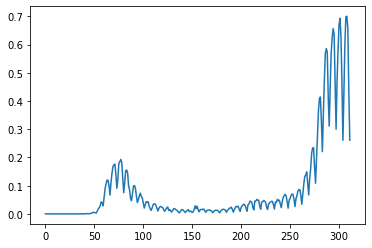

In [19]:
import matplotlib.pyplot as plt
plt.plot(train_scaled)
plt.show()

In [20]:
num_timesteps = 7
# Create the Keras model.
# Use hyperparameter optimization if you have the time.

ts_inputs = tf.keras.Input(shape=(num_timesteps, 1))

# units=10 -> The cell and hidden states will be of dimension 10.
#             The number of parameters that need to be trained = 4*units*(units+2)
x = layers.LSTM(units=10)(ts_inputs)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation='linear')(x)
model = tf.keras.Model(inputs=ts_inputs, outputs=outputs)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
# Specify the training configuration.
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mse'])

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Let's test model before training with last 28 days (= test set)
start = 0
end = len(test_scaled)
batch_size = 16
input_days = 7

i = 0
while i+input_days+batch_size<=end:
    batch_X = []
    batch_Y = []
    for y in range(0,batch_size-1):
        batch_X.append(np.expand_dims(test_scaled[i:i+7], axis=1))
        batch_Y.append(test_scaled[i+7])
        i+=1
batch_X = np.array(batch_X)
batch_Y = np.array(batch_Y)
    
results = model.evaluate(batch_X, batch_Y, batch_size=batch_size)

15/15 [==============================] - 0s 17ms/sample - loss: 0.2165 - mean_squared_error: 0.2165


In [24]:
dataset = train_scaled
start = 0
end = len(dataset)
batch_size = 16
input_days = 7
num_epochs = 500

for e in range(0,num_epochs):
    i = 0
    # train one epoch in batches:
    while i+(input_days+batch_size)<=end:
        batch_X = []
        batch_Y = []
        for y in range(0,batch_size-1):
            batch_X.append(np.expand_dims(dataset[i:i+7], axis=1))
            batch_Y.append(dataset[i+7])
            i+=1
        batch_X = np.array(batch_X)
        batch_Y = np.array(batch_Y)
        model.fit(x=batch_X, y=batch_Y, batch_size=16)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
15/15 [==============================] - 0s 662us/sample - loss: 3.6774e-04 - mean_squared_error: 3.6774e-04


15/15 [==============================] - 0s 604us/sample - loss: 5.1467e-04 - mean_squared_error: 5.1467e-04


15/15 [==============================] - 0s 649us/sample - loss: 5.6748e-04 - mean_squared_error: 5.6748e-04


15/15 [==============================] - 0s 630us/sample - loss: 4.2749e-04 - mean_squared_error: 4.2749e-04


15/15 [==============================] - 0s 578us/sample - loss: 3.5655e-04 - mean_squared_error: 3.5655e-04


15/15 [==============================] - 0s 600us/sample - loss: 3.5580e-04 - mean_squared_error: 3.5580e-04


15/15 [==============================] - 0s 662us/sample - loss: 2.6769e-04 - mean_squared_error: 2.6769e-04


15/15 [==============================] - 0s 573us/sample - loss: 3.6888e-04 - mean_squared_error: 3.6888e-04


15/15 [==============================] - 0s 620us/sample - loss: 2.7828e-04 - mean_squared_error: 2.7828e-04


15/15 [==============================] - 0s 594us/sample - loss: 3.2266e-04 - mean_squared_error: 3.2266e-04


15/15 [==============================] - 0s 636us/sample - loss: 4.8568e-04 - mean_squared_error: 4.8568e-04


15/15 [==============================] - 0s 562us/sample - loss: 4.6848e-04 - mean_squared_error: 4.6848e-04


15/15 [==============================] - 0s 603us/sample - loss: 7.7482e-04 - mean_squared_error: 7.7482e-04


15/15 [==============================] - 0s 622us/sample - loss: 9.4527e-04 - mean_squared_error: 9.4527e-04


15/15 [==============================] - 0s 590us/sample - loss: 8.1020e-04 - mean_squared_error: 8.1020e-04


15/15 [==============================] - 0s 603us/sample - loss: 0.0011 - mean_squared_error: 0.0011


15/15 [==============================] - 0s 588us/sample - loss: 7.3347e-04 - mean_squared_error: 7.3347e-04


15/15 [==============================] - 0s 644us/sample - loss: 0.0012 - mean_squared_error: 0.0012


15/15 [==============================] - 0s 635us/sample - loss: 0.0218 - mean_squared_error: 0.0218


15/15 [==============================] - 0s 570us/sample - loss: 2.5882e-04 - mean_squared_error: 2.5882e-04


15/15 [==============================] - 0s 634us/sample - loss: 3.1456e-04 - mean_squared_error: 3.1456e-04


15/15 [==============================] - 0s 625us/sample - loss: 4.4804e-04 - mean_squared_error: 4.4804e-04


15/15 [==============================] - 0s 651us/sample - loss: 7.0447e-04 - mean_squared_error: 7.0447e-04


15/15 [==============================] - 0s 598us/sample - loss: 7.4726e-04 - mean_squared_error: 7.4726e-04


15/15 [==============================] - 0s 635us/sample - loss: 5.3445e-04 - mean_squared_error: 5.3445e-04


15/15 [==============================] - 0s 607us/sample - loss: 0.0033 - mean_squared_error: 0.0033


15/15 [==============================] - 0s 573us/sample - loss: 3.6231e-04 - mean_squared_error: 3.6231e-04


15/15 [==============================] - 0s 650us/sample - loss: 3.9359e-04 - mean_squared_error: 3.9359e-04


15/15 [==============================] - 0s 616us/sample - loss: 3.0709e-04 - mean_squared_error: 3.0709e-04


15/15 [==============================] - 0s 658us/sample - loss: 9.6511e-04 - mean_squared_error: 9.6511e-04


15/15 [==============================] - 0s 644us/sample - loss: 6.9486e-04 - mean_squared_error: 6.9486e-04


15/15 [==============================] - 0s 601us/sample - loss: 0.0411 - mean_squared_error: 0.0411


15/15 [==============================] - 0s 639us/sample - loss: 3.3659e-04 - mean_squared_error: 3.3659e-04


15/15 [==============================] - 0s 621us/sample - loss: 2.1593e-04 - mean_squared_error: 2.1593e-04


15/15 [==============================] - 0s 596us/sample - loss: 4.8042e-04 - mean_squared_error: 4.8042e-04


15/15 [==============================] - 0s 650us/sample - loss: 3.5596e-04 - mean_squared_error: 3.5596e-04


15/15 [==============================] - 0s 633us/sample - loss: 0.0016 - mean_squared_error: 0.0016


15/15 [==============================] - 0s 619us/sample - loss: 2.6487e-04 - mean_squared_error: 2.6487e-04


15/15 [==============================] - 0s 627us/sample - loss: 0.0223 - mean_squared_error: 0.0223


15/15 [==============================] - 0s 693us/sample - loss: 2.5752e-04 - mean_squared_error: 2.5752e-04


15/15 [==============================] - 0s 641us/sample - loss: 2.5332e-04 - mean_squared_error: 2.5332e-04


15/15 [==============================] - 0s 637us/sample - loss: 2.6674e-04 - mean_squared_error: 2.6674e-04


15/15 [==============================] - 0s 636us/sample - loss: 4.4406e-04 - mean_squared_error: 4.4406e-04


15/15 [==============================] - 0s 635us/sample - loss: 8.2777e-04 - mean_squared_error: 8.2777e-04


15/15 [==============================] - 0s 646us/sample - loss: 3.6964e-04 - mean_squared_error: 3.6964e-04


15/15 [==============================] - 0s 602us/sample - loss: 0.0030 - mean_squared_error: 0.0030


15/15 [==============================] - 0s 611us/sample - loss: 1.6811e-04 - mean_squared_error: 1.6811e-04


15/15 [==============================] - 0s 643us/sample - loss: 1.0078e-04 - mean_squared_error: 1.0078e-04


15/15 [==============================] - 0s 628us/sample - loss: 3.2565e-04 - mean_squared_error: 3.2565e-04


15/15 [==============================] - 0s 646us/sample - loss: 0.0015 - mean_squared_error: 0.0015


15/15 [==============================] - 0s 677us/sample - loss: 3.1692e-04 - mean_squared_error: 3.1692e-04


15/15 [==============================] - 0s 660us/sample - loss: 0.0570 - mean_squared_error: 0.0570


15/15 [==============================] - 0s 932us/sample - loss: 3.1297e-04 - mean_squared_error: 3.1297e-04


15/15 [==============================] - 0s 570us/sample - loss: 1.8976e-04 - mean_squared_error: 1.8976e-04


15/15 [==============================] - 0s 537us/sample - loss: 9.8533e-05 - mean_squared_error: 9.8533e-05


15/15 [==============================] - 0s 843us/sample - loss: 3.0608e-04 - mean_squared_error: 3.0608e-04


15/15 [==============================] - 0s 941us/sample - loss: 0.0015 - mean_squared_error: 0.0015


15/15 [==============================] - 0s 645us/sample - loss: 5.3895e-04 - mean_squared_error: 5.3895e-04


15/15 [==============================] - 0s 550us/sample - loss: 0.0149 - mean_squared_error: 0.0149


15/15 [==============================] - 0s 606us/sample - loss: 1.6225e-04 - mean_squared_error: 1.6225e-04


15/15 [==============================] - 0s 564us/sample - loss: 1.9778e-04 - mean_squared_error: 1.9778e-04


15/15 [==============================] - 0s 615us/sample - loss: 2.3078e-04 - mean_squared_error: 2.3078e-04


15/15 [==============================] - 0s 560us/sample - loss: 4.3888e-04 - mean_squared_error: 4.3888e-04


15/15 [==============================] - 0s 569us/sample - loss: 8.1857e-04 - mean_squared_error: 8.1857e-04


15/15 [==============================] - 0s 628us/sample - loss: 5.4552e-04 - mean_squared_error: 5.4552e-04


15/15 [==============================] - 0s 834us/sample - loss: 0.0026 - mean_squared_error: 0.0026


15/15 [==============================] - 0s 562us/sample - loss: 1.5573e-04 - mean_squared_error: 1.5573e-04


15/15 [==============================] - 0s 581us/sample - loss: 2.5080e-04 - mean_squared_error: 2.5080e-04


15/15 [==============================] - 0s 608us/sample - loss: 2.6317e-04 - mean_squared_error: 2.6317e-04


15/15 [==============================] - 0s 567us/sample - loss: 0.0013 - mean_squared_error: 0.0013


15/15 [==============================] - 0s 552us/sample - loss: 2.3197e-04 - mean_squared_error: 2.3197e-04


15/15 [==============================] - 0s 542us/sample - loss: 0.0182 - mean_squared_error: 0.0182


15/15 [==============================] - 0s 554us/sample - loss: 3.4043e-04 - mean_squared_error: 3.4043e-04


15/15 [==============================] - 0s 554us/sample - loss: 2.4614e-04 - mean_squared_error: 2.4614e-04


15/15 [==============================] - 0s 546us/sample - loss: 3.2333e-04 - mean_squared_error: 3.2333e-04


15/15 [==============================] - 0s 552us/sample - loss: 2.0944e-04 - mean_squared_error: 2.0944e-04


15/15 [==============================] - 0s 560us/sample - loss: 0.0017 - mean_squared_error: 0.0017


15/15 [==============================] - 0s 559us/sample - loss: 1.7241e-04 - mean_squared_error: 1.7241e-04


15/15 [==============================] - 0s 581us/sample - loss: 0.0119 - mean_squared_error: 0.0119


15/15 [==============================] - 0s 554us/sample - loss: 1.3619e-04 - mean_squared_error: 1.3619e-04


15/15 [==============================] - 0s 547us/sample - loss: 1.9610e-04 - mean_squared_error: 1.9610e-04


15/15 [==============================] - 0s 590us/sample - loss: 1.7077e-04 - mean_squared_error: 1.7077e-04


15/15 [==============================] - 0s 550us/sample - loss: 3.2828e-04 - mean_squared_error: 3.2828e-04


15/15 [==============================] - 0s 541us/sample - loss: 6.5171e-04 - mean_squared_error: 6.5171e-04


15/15 [==============================] - 0s 555us/sample - loss: 4.0638e-04 - mean_squared_error: 4.0638e-04


15/15 [==============================] - 0s 563us/sample - loss: 0.0026 - mean_squared_error: 0.0026


15/15 [==============================] - 0s 603us/sample - loss: 1.4618e-04 - mean_squared_error: 1.4618e-04


15/15 [==============================] - 0s 551us/sample - loss: 3.3259e-04 - mean_squared_error: 3.3259e-04


15/15 [==============================] - 0s 558us/sample - loss: 2.5044e-04 - mean_squared_error: 2.5044e-04


15/15 [==============================] - 0s 555us/sample - loss: 0.0012 - mean_squared_error: 0.0012


15/15 [==============================] - 0s 563us/sample - loss: 3.3469e-04 - mean_squared_error: 3.3469e-04


15/15 [==============================] - 0s 551us/sample - loss: 0.0292 - mean_squared_error: 0.0292


15/15 [==============================] - 0s 570us/sample - loss: 3.7461e-04 - mean_squared_error: 3.7461e-04


15/15 [==============================] - 0s 558us/sample - loss: 1.3580e-04 - mean_squared_error: 1.3580e-04


15/15 [==============================] - 0s 565us/sample - loss: 4.7576e-04 - mean_squared_error: 4.7576e-04


15/15 [==============================] - 0s 551us/sample - loss: 4.2441e-04 - mean_squared_error: 4.2441e-04


15/15 [==============================] - 0s 542us/sample - loss: 0.0014 - mean_squared_error: 0.0014


15/15 [==============================] - 0s 577us/sample - loss: 3.7264e-04 - mean_squared_error: 3.7264e-04


15/15 [==============================] - 0s 546us/sample - loss: 0.0205 - mean_squared_error: 0.0205


15/15 [==============================] - 0s 566us/sample - loss: 2.0604e-04 - mean_squared_error: 2.0604e-04


15/15 [==============================] - 0s 540us/sample - loss: 3.4338e-04 - mean_squared_error: 3.4338e-04


15/15 [==============================] - 0s 567us/sample - loss: 2.6080e-04 - mean_squared_error: 2.6080e-04


15/15 [==============================] - 0s 553us/sample - loss: 3.9745e-04 - mean_squared_error: 3.9745e-04


15/15 [==============================] - 0s 554us/sample - loss: 6.7704e-04 - mean_squared_error: 6.7704e-04


15/15 [==============================] - 0s 570us/sample - loss: 5.1620e-04 - mean_squared_error: 5.1620e-04


15/15 [==============================] - 0s 551us/sample - loss: 0.0028 - mean_squared_error: 0.0028


15/15 [==============================] - 0s 558us/sample - loss: 2.2365e-04 - mean_squared_error: 2.2365e-04


15/15 [==============================] - 0s 546us/sample - loss: 3.0479e-04 - mean_squared_error: 3.0479e-04


15/15 [==============================] - 0s 572us/sample - loss: 3.6004e-04 - mean_squared_error: 3.6004e-04


15/15 [==============================] - 0s 568us/sample - loss: 0.0012 - mean_squared_error: 0.0012


15/15 [==============================] - 0s 559us/sample - loss: 2.7634e-04 - mean_squared_error: 2.7634e-04


15/15 [==============================] - 0s 565us/sample - loss: 0.0368 - mean_squared_error: 0.0368


15/15 [==============================] - 0s 581us/sample - loss: 3.1500e-04 - mean_squared_error: 3.1500e-04


15/15 [==============================] - 0s 546us/sample - loss: 2.7398e-04 - mean_squared_error: 2.7398e-04


15/15 [==============================] - 0s 551us/sample - loss: 2.2425e-04 - mean_squared_error: 2.2425e-04


15/15 [==============================] - 0s 555us/sample - loss: 2.3040e-04 - mean_squared_error: 2.3040e-04


15/15 [==============================] - 0s 550us/sample - loss: 0.0028 - mean_squared_error: 0.0028


15/15 [==============================] - 0s 544us/sample - loss: 7.2661e-04 - mean_squared_error: 7.2661e-04


15/15 [==============================] - 0s 570us/sample - loss: 0.0124 - mean_squared_error: 0.0124


15/15 [==============================] - 0s 574us/sample - loss: 2.8153e-04 - mean_squared_error: 2.8153e-04


15/15 [==============================] - 0s 551us/sample - loss: 2.1140e-04 - mean_squared_error: 2.1140e-04


15/15 [==============================] - 0s 543us/sample - loss: 2.5546e-04 - mean_squared_error: 2.5546e-04


15/15 [==============================] - 0s 554us/sample - loss: 3.1328e-04 - mean_squared_error: 3.1328e-04


15/15 [==============================] - 0s 549us/sample - loss: 7.6782e-04 - mean_squared_error: 7.6782e-04


15/15 [==============================] - 0s 553us/sample - loss: 2.9916e-04 - mean_squared_error: 2.9916e-04


15/15 [==============================] - 0s 600us/sample - loss: 0.0025 - mean_squared_error: 0.0025


15/15 [==============================] - 0s 545us/sample - loss: 2.5853e-04 - mean_squared_error: 2.5853e-04


15/15 [==============================] - 0s 551us/sample - loss: 1.5700e-04 - mean_squared_error: 1.5700e-04


15/15 [==============================] - 0s 547us/sample - loss: 1.7133e-04 - mean_squared_error: 1.7133e-04


15/15 [==============================] - 0s 551us/sample - loss: 0.0384 - mean_squared_error: 0.0384


In [25]:
start = 0
end = len(complete_scaled)
predictions = []

i = 0
# predict one epoch:
while i+7<=end:
    X = np.expand_dims(np.expand_dims(complete_scaled[i:i+7], axis=1),axis=0)
    i+=1
    predictions.append(model.predict(X)[0])

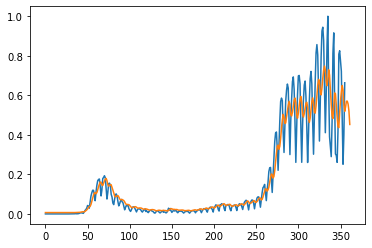

In [26]:
plt.plot(complete_scaled[7:363],label="truth") # first seven days (0-6) were used as input for prediction
plt.plot(predictions[0:],label="predicted")
plt.show()

In [27]:
# Let's test model with last 28 days (= test set)
dataset = test_scaled
start = 0
end = len(dataset)
batch_size = 16
input_days = 7

i = 0
while i+(input_days*batch_size)<=end:
    batch_X = []
    batch_Y = []
    for y in range(0,batch_size-1):
        batch_X.append(np.expand_dims(dataset[i:i+7], axis=1))
        batch_Y.append(dataset[i+7])
        i+=1
batch_X = np.array(batch_X)
batch_Y = np.array(batch_Y)
    
results = model.evaluate(batch_X, batch_Y, batch_size=batch_size)

15/15 [==============================] - 0s 245us/sample - loss: 0.0208 - mean_squared_error: 0.0208


In [28]:
# Let's validate
dataset = val_scaled
start = 0
end = len(dataset)
batch_size = 16
input_days = 7

i = 0
while i+(input_days*batch_size)<=end:
    batch_X = []
    batch_Y = []
    for y in range(0,batch_size-1):
        batch_X.append(np.expand_dims(dataset[i:i+7], axis=1))
        batch_Y.append(dataset[i+7])
        i+=1
batch_X = np.array(batch_X)
batch_Y = np.array(batch_Y)
    
results = model.evaluate(batch_X, batch_Y, batch_size=batch_size)

15/15 [==============================] - 0s 201us/sample - loss: 0.0208 - mean_squared_error: 0.0208


In [29]:
start = 0
end = len(val_scaled)
predictions = []

i = 0
# predict one epoch:
while i+7<=end:
    X = np.expand_dims(np.expand_dims(val_scaled[i:i+7], axis=1),axis=0)
    i+=1
    predictions.append(model.predict(X)[0])

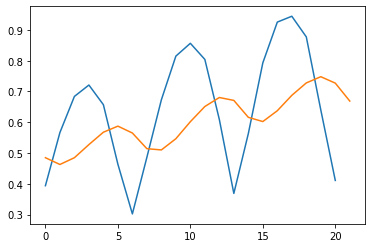

In [30]:
plt.plot(val_scaled[7:],label="truth") # first seven days (0-6) were used as input for prediction
plt.plot(predictions,label="predicted")
plt.show()